# IS 2053-001 Stock Data Analysis Project
Authors: Steven Kubecka and Cody Snyder

## Imports

In [210]:
import pandas as pd
import matplotlib.pyplot as plt


## Global Variables
- The Main Data Frame with the data from the .csv file to be used throughout the project
- List of column names

In [211]:
#read file into data frame
df = pd.read_csv("data/15 Years Stock Data of NVDA AAPL MSFT GOOGL and AMZN.csv", parse_dates=["Date"])
CLOSING_PRICE_COLS = ["Close_AAPL", "Close_AMZN", "Close_GOOGL", "Close_MSFT", "Close_NVDA"] #Columns names for daily closing prices
OPENING_PRICE_COLS = ["Open_AAPL", "Open_AMZN", "Open_GOOGL", "Open_MSFT", "Open_NVDA"] #Columns names for daily opening prices
HIGH_COLS = ["High_AAPL", "High_AMZN", "High_GOOGL", "High_MSFT", "High_NVDA"] #Column names for the daily highs
LOW_COLS = ["Low_AAPL", "Low_AMZN", "Low_GOOGL", "Low_MSFT", "Low_NVDA"] #Column names for the daily lows
VOLUME_COLS = ["Volume_AAPL","Volume_AMZN", "Volume_GOOGL", "Volume_MSFT", "Volume_NVDA"] #Columns names for the daily volumes
STOCKS = ["AAPL", "AMZN", "GOOGL", "MSFT", "NVDA"] #Used to rename columns thoughout the project

## Added Columns
- Year
- df info (remove later)

In [212]:
df['Year'] = df['Date'].dt.year #creates a new column for the year
df.info() #displays the top 5 rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3774 entries, 0 to 3773
Data columns (total 27 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          3774 non-null   datetime64[ns]
 1   Close_AAPL    3774 non-null   float64       
 2   Close_AMZN    3774 non-null   float64       
 3   Close_GOOGL   3774 non-null   float64       
 4   Close_MSFT    3774 non-null   float64       
 5   Close_NVDA    3774 non-null   float64       
 6   High_AAPL     3774 non-null   float64       
 7   High_AMZN     3774 non-null   float64       
 8   High_GOOGL    3774 non-null   float64       
 9   High_MSFT     3774 non-null   float64       
 10  High_NVDA     3774 non-null   float64       
 11  Low_AAPL      3774 non-null   float64       
 12  Low_AMZN      3774 non-null   float64       
 13  Low_GOOGL     3774 non-null   float64       
 14  Low_MSFT      3774 non-null   float64       
 15  Low_NVDA      3774 non-null   float64 

## Question 1. Visualizing Comparitive Growth with Annual Percent Change

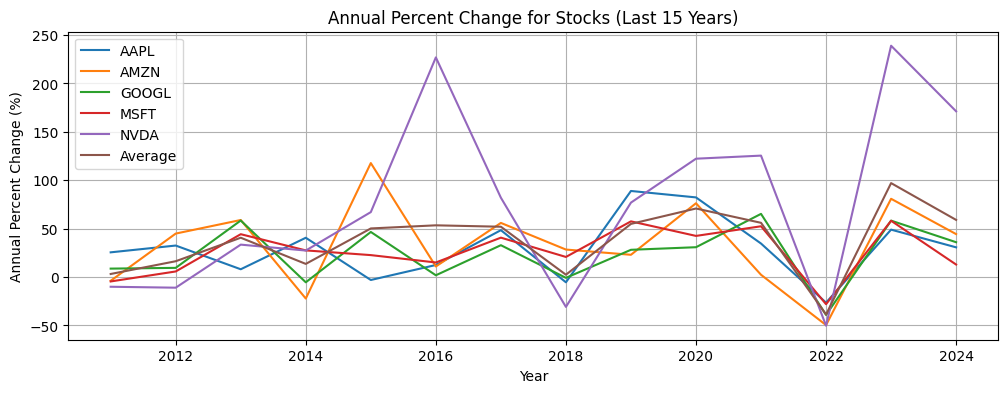

,AAPL,AMZN,GOOGL,MSFT,NVDA,Average
Year,,,,,,
2010,NaN,NaN,NaN,NaN,NaN,NaN
2011,25.56,-3.83,8.74,-4.52,-10.00,3.190
2012,32.57,44.93,9.52,5.80,-10.97,16.370
2013,8.07,58.96,58.43,44.30,33.52,40.656
2014,40.62,-22.18,-5.39,27.56,27.40,13.602
2015,-3.01,117.78,46.61,22.69,67.12,50.238
2016,12.48,10.95,1.86,15.08,226.96,53.466
2017,48.46,55.96,32.93,40.73,81.99,52.014
2018,-5.39,28.43,-0.80,20.80,-30.82,2.444


In [213]:

aar = df.groupby("Year")[CLOSING_PRICE_COLS].last().pct_change()*100 #Groups the data by year and calculates the percent change
aar = aar.round(2) #Round the percentages to 2 decimal places
aar.columns = STOCKS #Renames Columns for better clarity
aar["Average"] = aar.mean(axis=1) #Adds a column with the average annual percent change of the 5 stocks

#Line Graph
plt.figure(figsize=(12, 4)) #Sets size of the line graph
for stock in STOCKS: #loops though each stock
    plt.plot(aar.index, aar[stock], label=stock) #plots the graph you see below
plt.plot(aar.index, aar["Average"], label="Average") #plots the average line

#Lables and Title
plt.xlabel("Year")
plt.ylabel("Annual Percent Change (%)")
plt.title("Annual Percent Change for Stocks (Last 15 Years)")

plt.legend() #adds a legend
plt.grid() #adds a grid
plt.show() #displays the line graph

#Displays the Data Frame as a Table
aar

#### Take Aways
- All of these stocks belong to the tech sector and by viewing the graph we can see for the most part they move together with some outliers. For example all the stocks in 2022 lost over 25% of their value during a economic downturn. A outlier would be that in 2016 Nividia grew by 227% while none of the other four exceded growth of 16%.
- The graph also displays the volatility of the stocks with the less volatile stocks having flatter lines with less extreme peaks like Google and Microsoft and the more volatile stocks like Amazon and Nividia.
- Finally, the graph and table show if a particular stock outperformed or underperformed relative to the average annual percent change of the other stocks. 
- This knowledge together provides a history of the particular stocks over the last 15 years and their relative performance compared to eachother.

## Question 2: Which year did each company have their highest and lowest shares?

In [214]:
# Define a function to find the years with the highest and lowest share prices for each company
def find_highest_and_lowest_years(df, CLOSING_PRICE_COLS):
    # Find the rows corresponding to the highest closing prices for each stock
    highest_years = df.loc[df[CLOSING_PRICE_COLS].idxmax()]
    # Find the rows corresponding to the lowest closing prices for each stock
    lowest_years = df.loc[df[CLOSING_PRICE_COLS].idxmin()]

    # Extract the 'Date' and closing price columns for the highest and lowest prices
    highest_years = highest_years[["Date"] + CLOSING_PRICE_COLS]
    lowest_years = lowest_years[["Date"] + CLOSING_PRICE_COLS]

    # Add a 'Year' column for clarity, extracted from the 'Date' column
    highest_years["Year"] = highest_years["Date"].dt.year
    lowest_years["Year"] = lowest_years["Date"].dt.year

    # Round the closing prices to two decimal places for better readability
    highest_years[CLOSING_PRICE_COLS] = highest_years[CLOSING_PRICE_COLS].round(2)
    lowest_years[CLOSING_PRICE_COLS] = lowest_years[CLOSING_PRICE_COLS].round(2)

    # Return the dataframes containing the highest and lowest years with their prices
    return highest_years, lowest_years

# Call the function to find the highest and lowest years for each stock
highest_years, lowest_years = find_highest_and_lowest_years(df, CLOSING_PRICE_COLS)

# Display the highest share prices by year in a transposed format for better readability
print("Highest Share Prices by Year:")
print(highest_years[["Year"] + CLOSING_PRICE_COLS].set_index("Year").T)

# Display the lowest share prices by year in a transposed format for better readability
print("\nLowest Share Prices by Year:")
print(lowest_years[["Year"] + CLOSING_PRICE_COLS].set_index("Year").T)


Highest Share Prices by Year:
Year           2024    2024    2024    2024    2024
Close_AAPL   258.74  250.76  250.76  225.58  226.98
Close_AMZN   227.05  232.93  232.93  200.00  210.05
Close_GOOGL  195.38  196.43  196.43  189.91  180.34
Close_MSFT   437.23  450.69  450.69  464.85  423.73
Close_NVDA   139.92  131.99  131.99  125.80  148.86

Lowest Share Prices by Year:
Year          2010   2010   2010   2010   2010
Close_AAPL    5.78   7.71   7.48   7.57   7.53
Close_AMZN    5.80   5.43   5.50   5.46   6.29
Close_GOOGL  13.12  11.31  10.86  11.08  12.25
Close_MSFT   20.92  17.68  18.06  17.45  18.85
Close_NVDA    0.36   0.24   0.23   0.23   0.20


### What to take from this information

The analysis of stock data and financial metrics can provide valuable insights for companies in several ways:

1. **Investment Decisions**:
    - By identifying the stock with the highest Compound Annual Growth Rate (CAGR), companies can make informed decisions about where to allocate resources or investments for maximum returns.

2. **Market Trends**:
    - Analyzing annual percent changes and average closing prices helps companies understand market trends and the performance of competitors over time.

3. **Strategic Planning**:
    - Insights into the highest and lowest share prices for each year can guide companies in setting realistic financial goals and strategies to improve their market position.

4. **Risk Assessment**:
    - Understanding the volatility of stock prices (e.g., highest and lowest prices) allows companies to assess risks and prepare for potential market fluctuations.

5. **Performance Benchmarking**:
    - Comparing their own performance with competitors (e.g., average closing prices and CAGR) enables companies to benchmark their success and identify areas for improvement.

6. **Investor Relations**:
    - Companies can use this data to communicate their financial health and growth potential to current and prospective investors, fostering trust and confidence.

7. **Long-Term Planning**:
    - Historical data, such as the last 15 years of stock performance, provides a foundation for long-term planning and forecasting future growth opportunities.

By leveraging this information, companies can make data-driven decisions to enhance profitability, competitiveness, and sustainability in the market.

## Question 3: What is the average closing price for each company over the last 15 years?

In [215]:
def calculate_average_closing_prices(df, CLOSING_PRICE_COLS, STOCKS):
    # Calculate the average closing price for each stock over the last 15 years
    average_closing_prices = df[CLOSING_PRICE_COLS].mean().round(2)

    # Rename the columns for better readability
    average_closing_prices.index = STOCKS

    # Return the average closing prices
    return average_closing_prices

# Call the function and display the average closing prices
average_closing_prices = calculate_average_closing_prices(df, CLOSING_PRICE_COLS, STOCKS)
print("Average Closing Prices for Each Stock Over the Last 15 Years:")
print(average_closing_prices)

Average Closing Prices for Each Stock Over the Last 15 Years:
AAPL      67.52
AMZN      71.44
GOOGL     61.15
MSFT     129.58
NVDA      13.98
dtype: float64


### Insights for Companies from the Analysis

The information derived from the analysis of stock data can be instrumental for companies in several ways:

1. **Market Positioning**:
    - Understanding the average closing prices over the last 15 years provides insights into the long-term stability and performance of competitors, enabling companies to benchmark their own performance.

2. **Risk Management**:
    - Analyzing the highest and lowest share prices for each year allows companies to assess market volatility and prepare for potential risks.

3. **Strategic Planning**:
    - Insights into annual percent changes and trends over time can guide companies in setting realistic financial goals and adapting their strategies to market conditions.

4. **Investor Confidence**:
    - Companies can use this data to demonstrate their growth potential and financial health to investors, fostering trust and encouraging investment.

5. **Competitor Analysis**:
    - Comparing the performance of different stocks helps companies understand their competitive landscape and identify areas for improvement.

6. **Long-Term Forecasting**:
    - Historical data, such as the last 15 years of stock performance, provides a foundation for predicting future trends and planning long-term growth strategies.

By leveraging these insights, companies can make data-driven decisions to enhance profitability, competitiveness, and sustainability in the market.

## Question 4: Using this data, which company should someone invest in for the best return on investments?

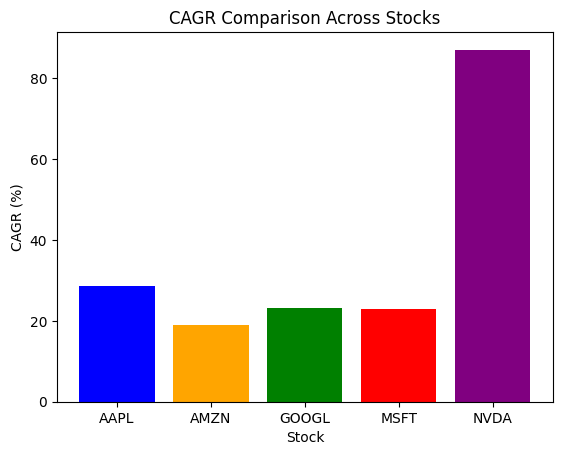

Compound Annual Growth Rate (CAGR) for the last 5 years:
AAPL     28.61
AMZN     18.88
GOOGL    23.19
MSFT     22.82
NVDA     87.09
dtype: float64

The best stock to invest in for the most profit over the next 5 years is: $NVDA


In [ ]:
# Filter data for the last 5 years
last_5_years = df[df["Date"] >= (df["Date"].max() - pd.DateOffset(years=5))]

# Initialize a dictionary to store the CAGR for each stock
cagr = {}

# Loop through each stock's closing price column to calculate CAGR
for col in CLOSING_PRICE_COLS:
    start_price = last_5_years[col].iloc[0]  # Get the starting price for the stock
    end_price = last_5_years[col].iloc[-1]  # Get the ending price for the stock
    years = 5  # Define the time period in years
    # Calculate CAGR using the formula and store it in the dictionary
    cagr[col] = ((end_price / start_price) ** (1 / years) - 1) * 100

# Convert the CAGR dictionary to a pandas Series for better readability
cagr_series = pd.Series(cagr).round(2)
cagr_series.index = STOCKS #Renames the index values

# Creates a Bar Chart
plt.bar(STOCKS, cagr_series, color=['blue', 'orange', 'green', 'red', 'purple'])

# Labels and title
plt.xlabel('Stock')
plt.ylabel('CAGR (%)')
plt.title('CAGR Comparison Across Stocks')

# Displays the Chart
plt.show()


# Find the stock with the highest CAGR
best_investment = cagr_series.idxmax()

# Print the CAGR for each stock
print("Compound Annual Growth Rate (CAGR) for the last 5 years:")
print(cagr_series)

# Print the stock with the highest CAGR as the best investment option
print(f"\nThe best stock to invest in for the most profit over the next 5 years is: ${best_investment}")

### Insights for Companies from the Analysis

The information derived from the analysis of stock data can be instrumental for companies in several ways:

1. **Investment Strategy**:
    - Identifying the stock with the highest Compound Annual Growth Rate (CAGR) helps companies and investors make informed decisions about where to allocate resources for maximum returns.

3. **Risk Management**:
    - Analyzing the highest and lowest share prices for each year allows companies to assess market volatility and prepare for potential risks.

4. **Strategic Planning**:
    - Insights into annual percent changes and trends over time can guide companies in setting realistic financial goals and adapting their strategies to market conditions.

5. **Investor Confidence**:
    - Companies can use this data to demonstrate their growth potential and financial health to investors, fostering trust and encouraging investment.

6. **Competitor Analysis**:
    - Comparing the performance of different stocks helps companies understand their competitive landscape and identify areas for improvement.

7. **Long-Term Forecasting**:
    - Historical data, such as the last 15 years of stock performance, provides a foundation for predicting future trends and planning long-term growth strategies.

By leveraging these insights, companies can make data-driven decisions to enhance profitability, competitiveness, and sustainability in the market.

## Question 5: Visualizing Volatility with Normalized Average True Range percentage
- True Range = Max [Daily High - Daily Low, Daily High - Previous Close, Daily Low - Previous Close]
- Average True Range = (Previous Average True Range * (Number of Periods - 1) + True Range) / Number of Periods
- Normalized Average True Range = Average True Range / Closing Price

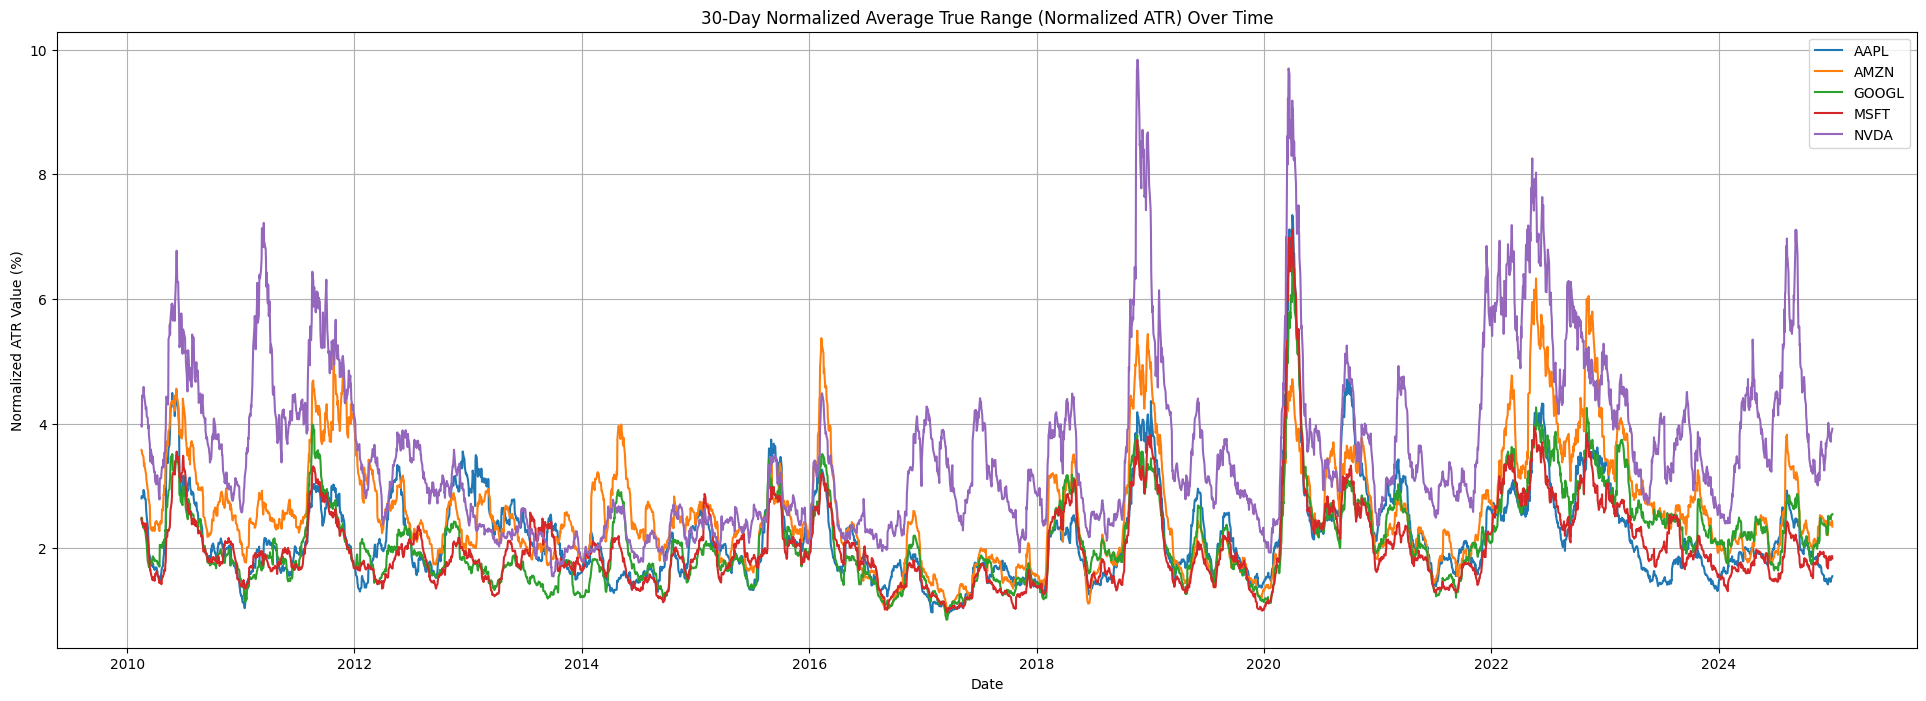

,Average Normalized ATR
AAPL,2.191537
AMZN,2.588643
GOOGL,2.122763
MSFT,2.025663
NVDA,3.551339


In [217]:
atr_df = pd.DataFrame() #Creates a new data frame

for stock in STOCKS: #loops through each stock
  #TR Calculation
  atr_df[f'High-Low_{stock}'] = df[f'High_{stock}'] - df[f'Low_{stock}'] #Adds a column with the difference between High and Low for each day
  atr_df[f'High-Prev_Close_{stock}'] = abs(df[f'High_{stock}'] - df[f'Close_{stock}'].shift(1)) #Adds a column with the absolute value of the difference between High and Previous Close for each day
  atr_df[f'Low-Prev_Close_{stock}'] = abs(df[f'Low_{stock}'] - df[f'Close_{stock}'].shift(1)) #Adds a column with the absolute value of the difference between Low and Previous Close for each day
  atr_df[f'TR_{stock}'] = atr_df[[f'High-Low_{stock}', f'High-Prev_Close_{stock}', f'Low-Prev_Close_{stock}']].max(axis=1) #Adds a column with the True Range value which is the largest value of the previous three

  #ATR and Normalized ATR Calculation
  atr_df[f'ATR_{stock}'] = atr_df[f'TR_{stock}'].rolling(window=30).mean() #Rolling 30 day Average of the TR
  atr_df[f'Normalized_ATR_{stock}'] = atr_df[f'ATR_{stock}']/df[f'Close_{stock}']*100 #Normalized by dividng by closing price and multiplying by 100 to get the percentage

#Line Graph
plt.figure(figsize=(24, 8)) #Plot size Large size is needed for the amount of data points
for stock in STOCKS: #loops though each stock
    plt.plot(df['Date'], atr_df[f'Normalized_ATR_{stock}'], label=stock) #plots the graph you see below

#labels and title
plt.xlabel('Date')
plt.ylabel('Normalized ATR Value (%)')
plt.title('30-Day Normalized Average True Range (Normalized ATR) Over Time')

plt.legend() #Adds a legend
plt.grid(True) #Adds a grid
plt.show() #Displays the line graph

#Average Normalized ATR Table
average_atr = atr_df[[f'Normalized_ATR_{stock}' for stock in STOCKS]].mean().to_frame() #Creates a new frame which contains the average Normalized ATRs for each stock
average_atr.index = STOCKS #Changes the index to be the Stock names
average_atr.columns = ['Average Normalized ATR'] #Adds a column name
average_atr #Displays the data frame


### Take Aways
- Average True Range (ATR) is a indicator of volatility and shows the price swings for a given period
- A Normalized Average True Range (Normalized ATR) is simply the percentage of the stock price
- A higher ATR typically means there is more volatility. As you can see Nividia for most of the 15 year period has the highest Normalized ATR.
- Jumps in Normalized ATR shows increasing volatility, often due to earnings reports or market events while drops signify stabilization
- The table is the average of Normalized ATR which is used an reference to see if a stock is potentially more volatile than usual
- Traders can use this information to set up stop-loss levels so that they sell their stocks if the price dips below normal price movements which is reflected in the ATR.
- Different trading strategies call for different types of stocks where momentum traders might favor higher Normalized ATRs and those looking for long term invesment would look for lower values.
